In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.8.16 | packaged by conda-forge | (default, Feb  1 2023, 16:05:36) 
[Clang 14.0.6 ]
pandas version: 1.5.3
NumPy version: 1.24.2
SciPy version: 1.10.0
IPython version: 8.9.0
scikit-learn version: 1.2.2


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Breast Cancer Types for Clustering")\
      .config("spark.some.config.option", 'some-value')\
      .getOrCreate()

24/01/15 11:52:30 WARN Utils: Your hostname, MacBook-Pro-de-Rafael.local resolves to a loopback address: 127.0.0.1; using 192.168.1.36 instead (on interface en0)


In [49]:
cancer=pd.read_csv('/Users/rafaelotero/Desktop/breast cancer.csv')

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
cancer=cancer.drop(['Unnamed: 32'],axis=1)

In [52]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
cancer.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [54]:
cancer_M = cancer[cancer['diagnosis'] == 'M']

In [55]:
cancer_M

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [56]:
cancer_M.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [57]:
cancer['diagnosis'] == 'M'

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

In [59]:
cancer_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       212 non-null    int64  
 1   diagnosis                212 non-null    object 
 2   radius_mean              212 non-null    float64
 3   texture_mean             212 non-null    float64
 4   perimeter_mean           212 non-null    float64
 5   area_mean                212 non-null    float64
 6   smoothness_mean          212 non-null    float64
 7   compactness_mean         212 non-null    float64
 8   concavity_mean           212 non-null    float64
 9   concave points_mean      212 non-null    float64
 10  symmetry_mean            212 non-null    float64
 11  fractal_dimension_mean   212 non-null    float64
 12  radius_se                212 non-null    float64
 13  texture_se               212 non-null    float64
 14  perimeter_se             2

In [65]:
cancer_Mp=cancer_M.drop(['id','diagnosis'],axis=1)

In [67]:
cols=cancer_Mp.columns

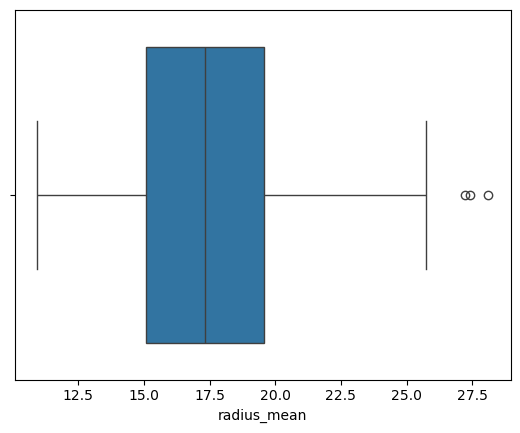

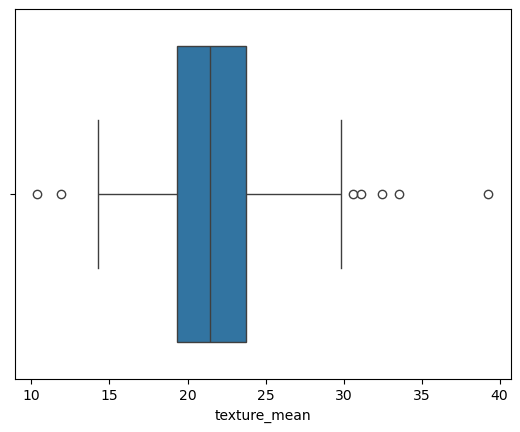

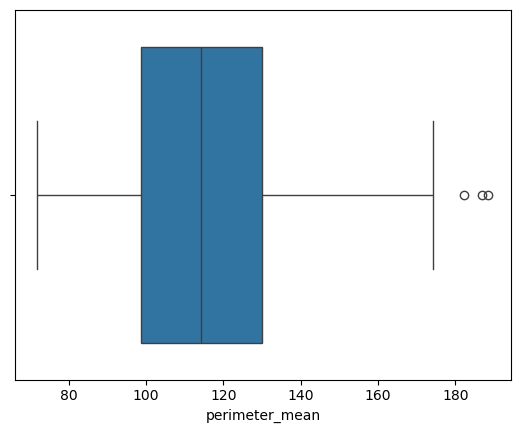

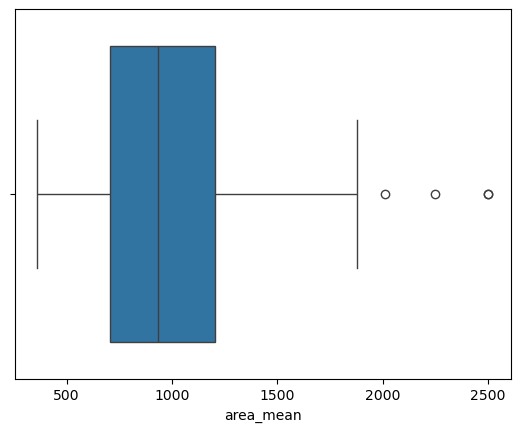

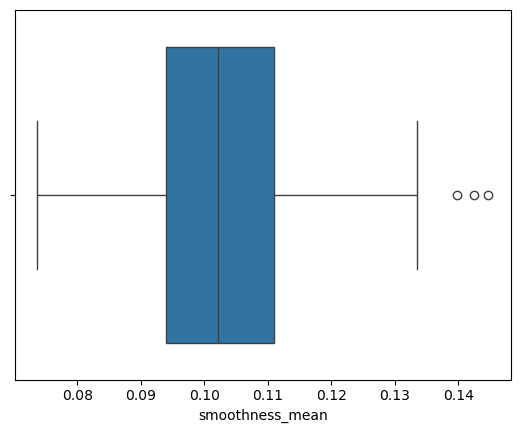

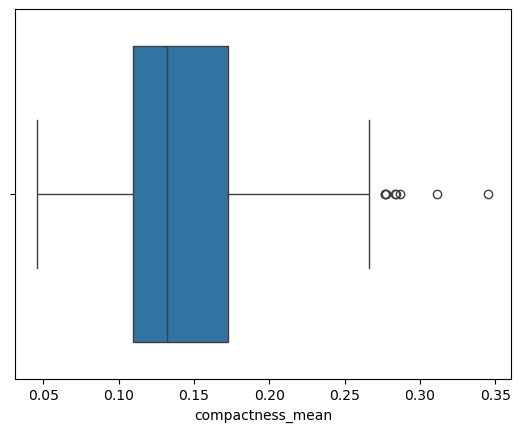

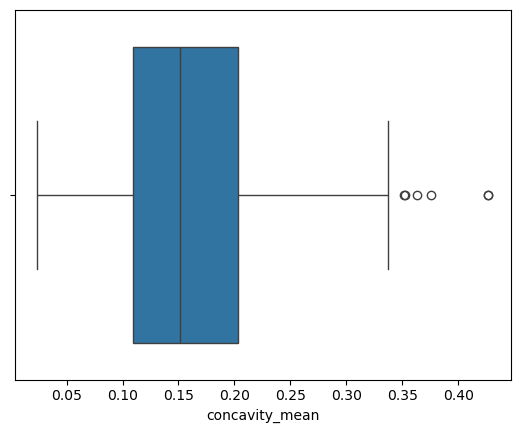

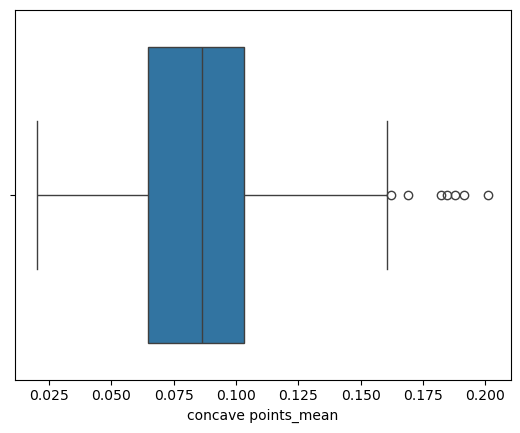

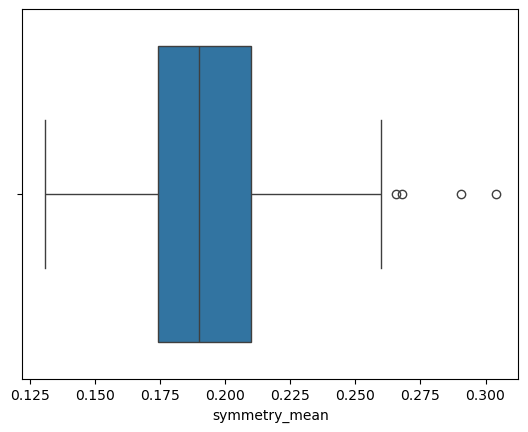

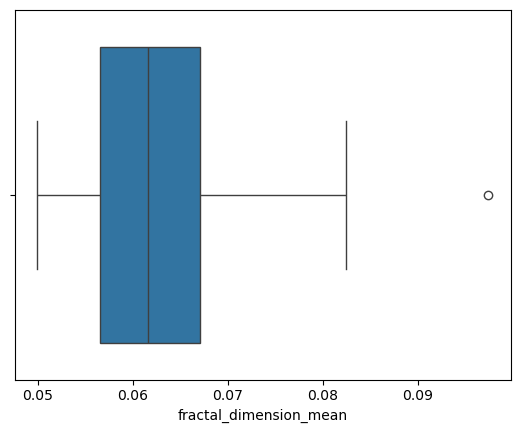

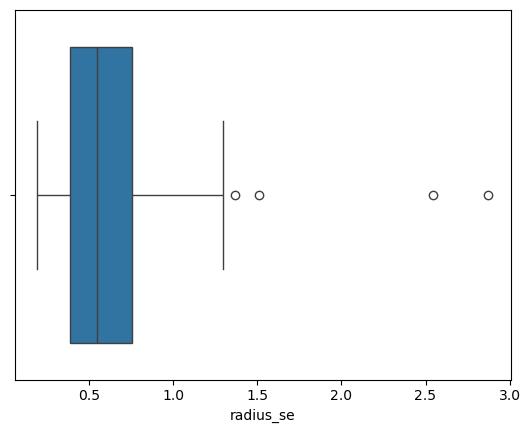

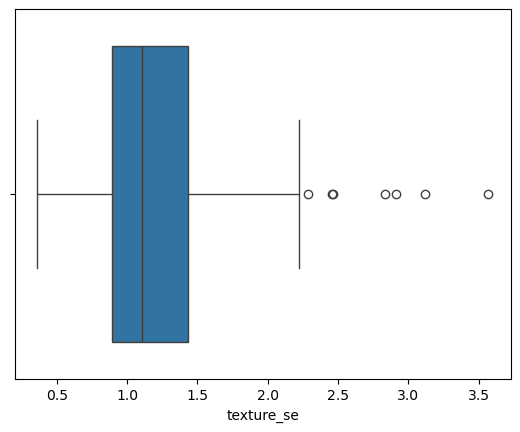

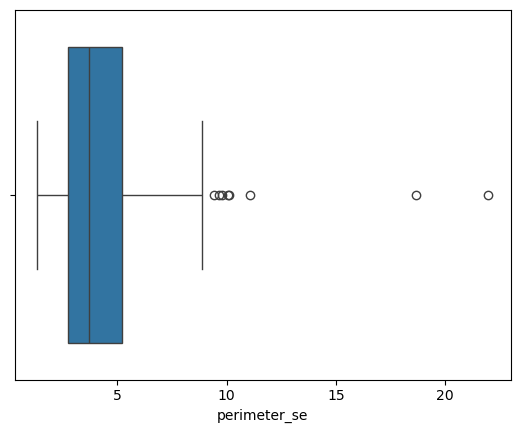

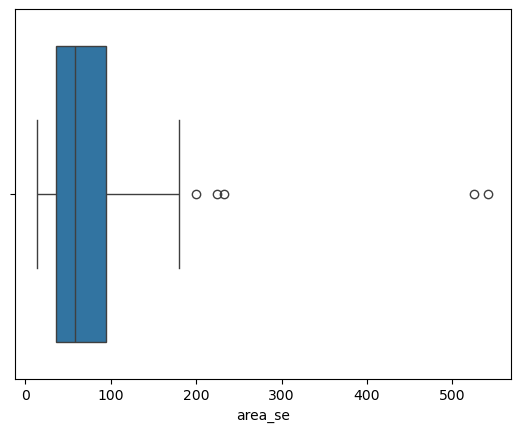

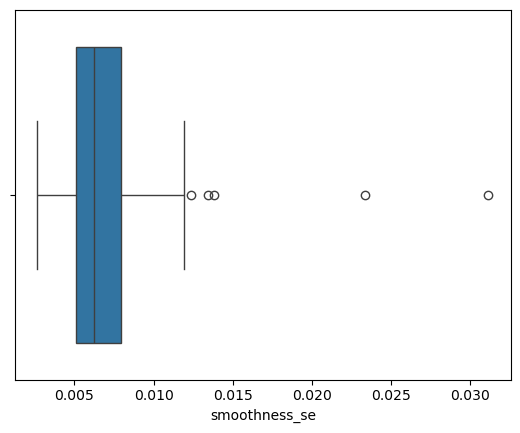

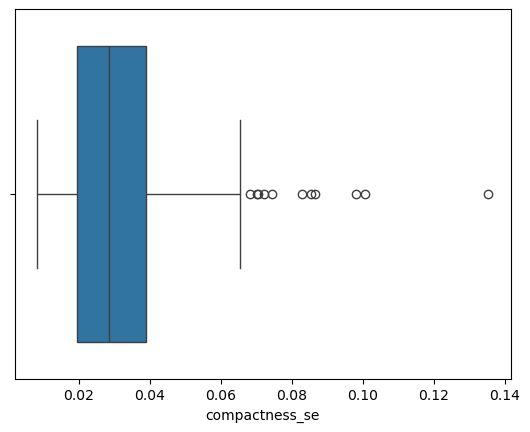

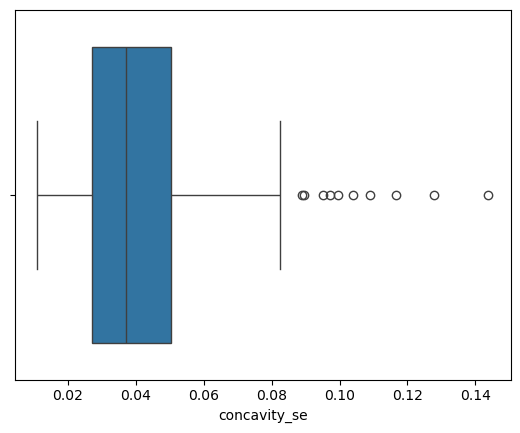

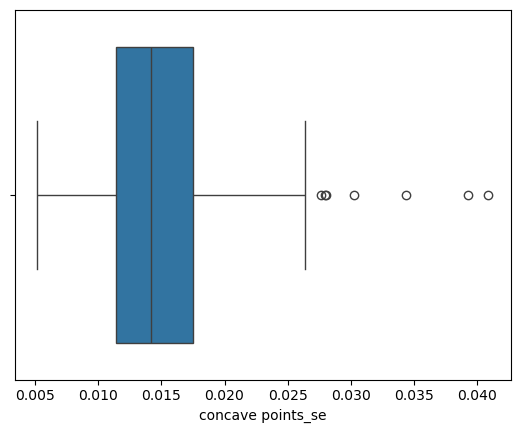

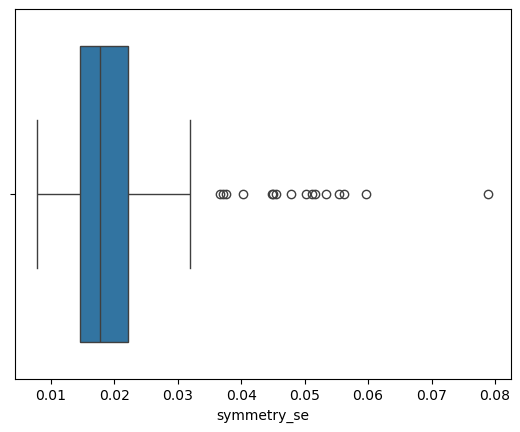

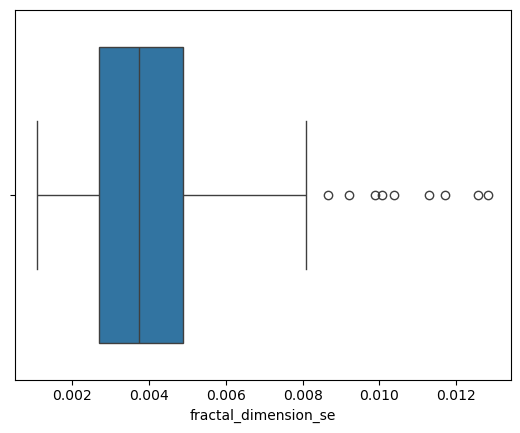

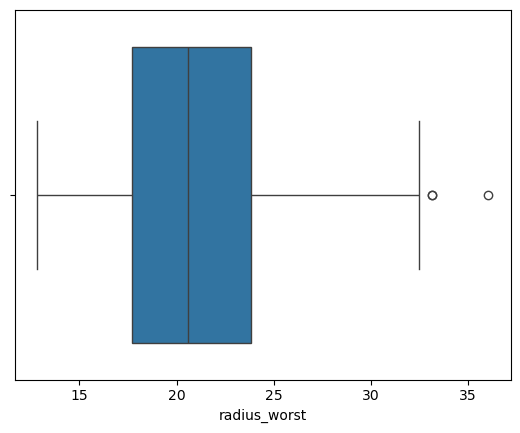

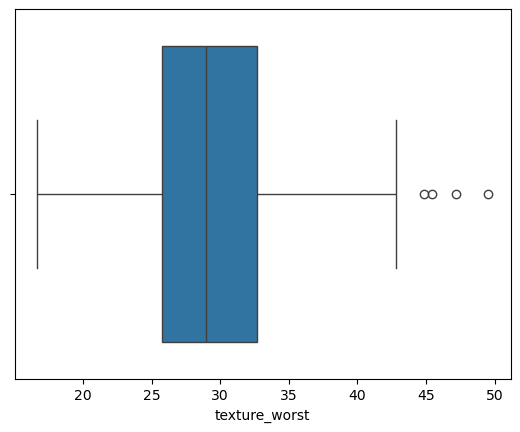

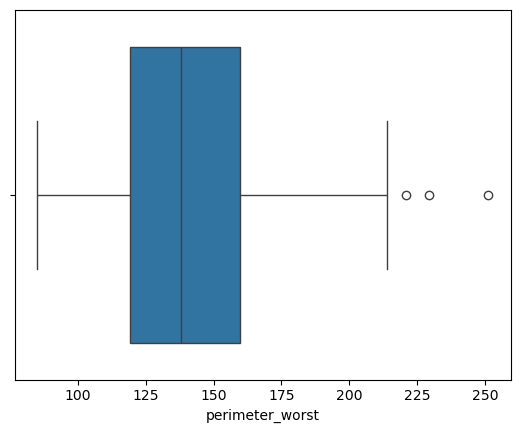

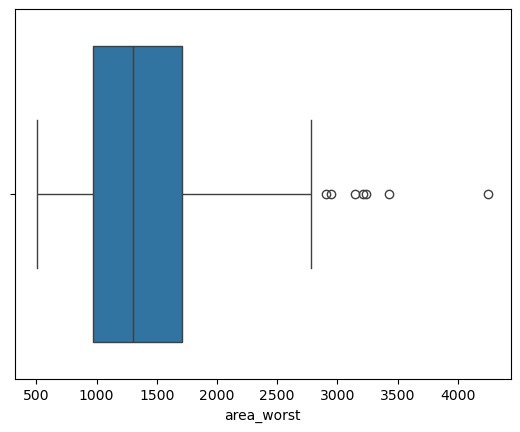

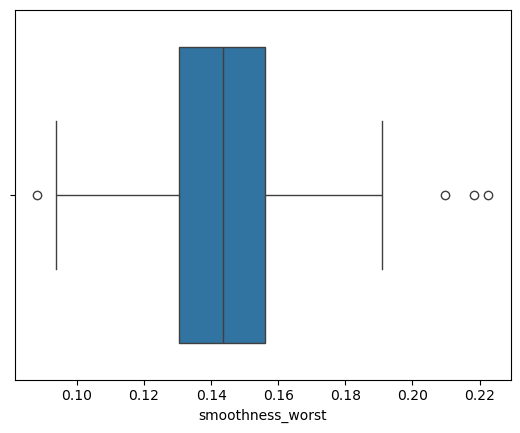

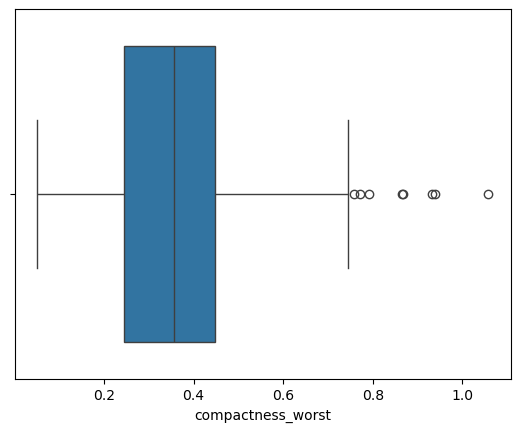

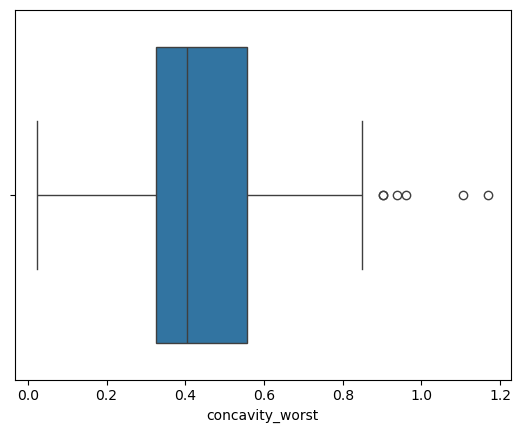

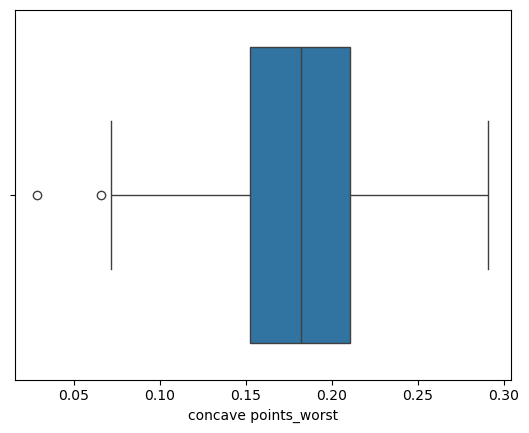

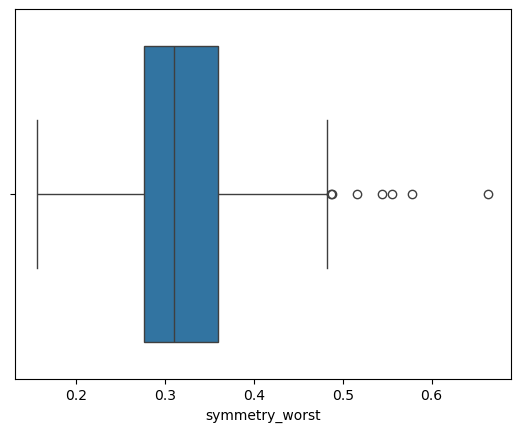

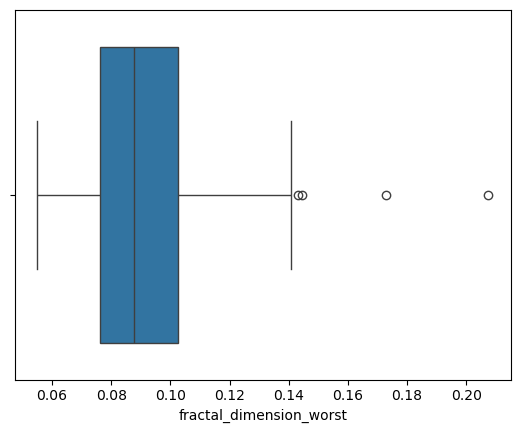

In [68]:
for col in cols:
    sns.boxplot(x = cancer_Mp[col])
    plt.show()

Ajustamos Outliers de nuestros datos:

In [72]:
def No_outliers(df, cols):
    for col in cols:
        
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        
        IQR = Q3-Q1
        limite_bajo  = Q1 - 1.5 * IQR
        limite_alto = Q3 + 1.5 * IQR
        
        df[col] = np.where((df[col] > limite_alto), limite_alto, 
                                  np.where((df[col] < limite_bajo), limite_bajo, df[col]))

In [76]:
No_outliers(cancer_Mp,cols)

Veamos si hemos corregido los Outliers:

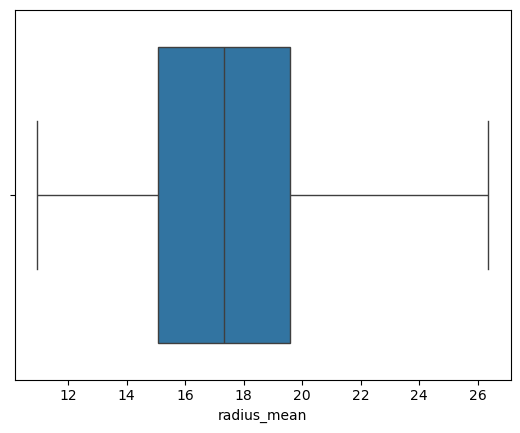

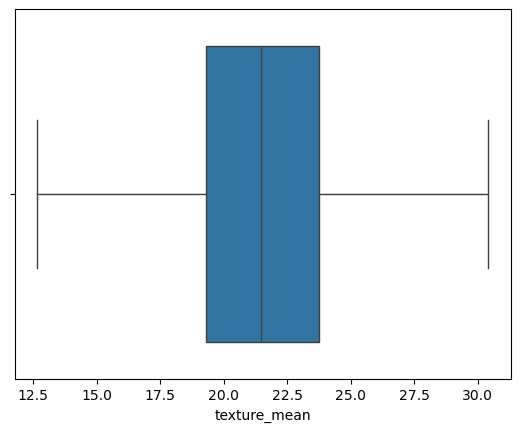

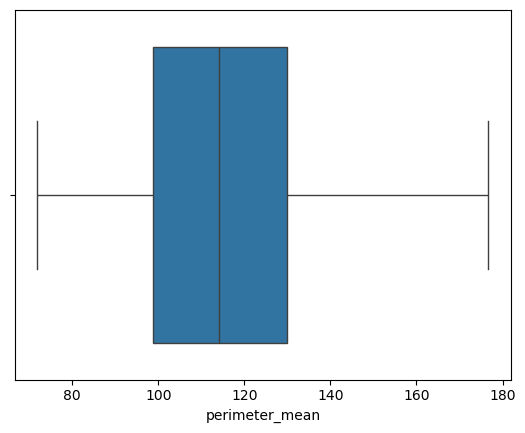

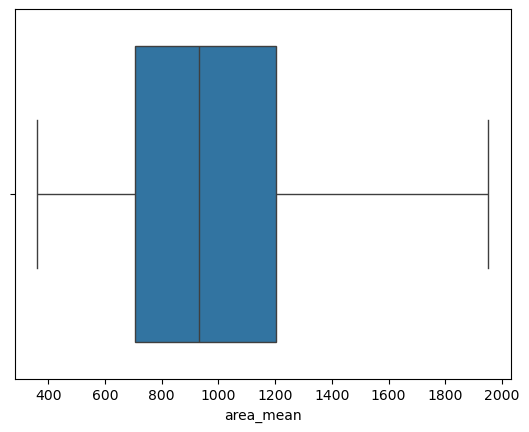

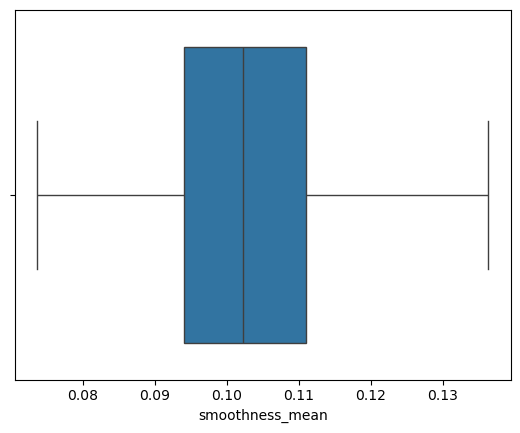

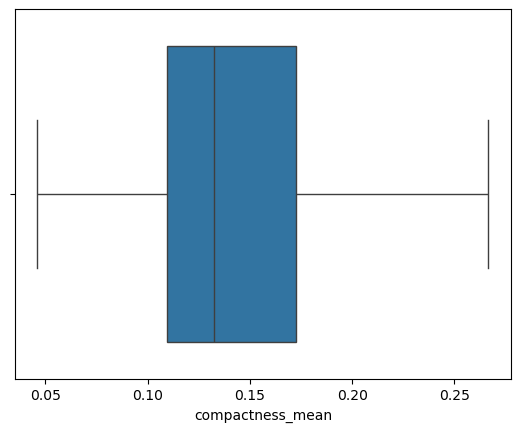

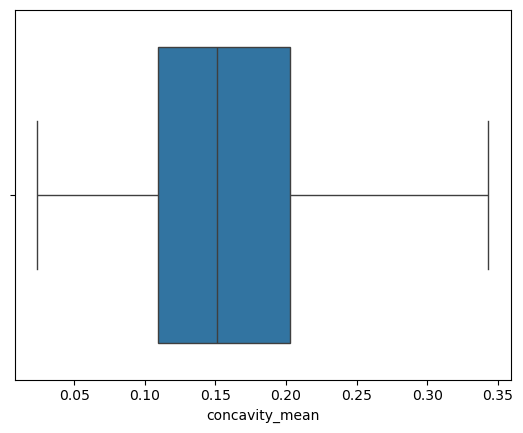

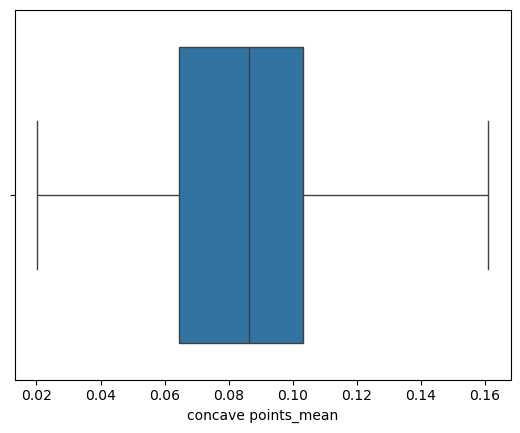

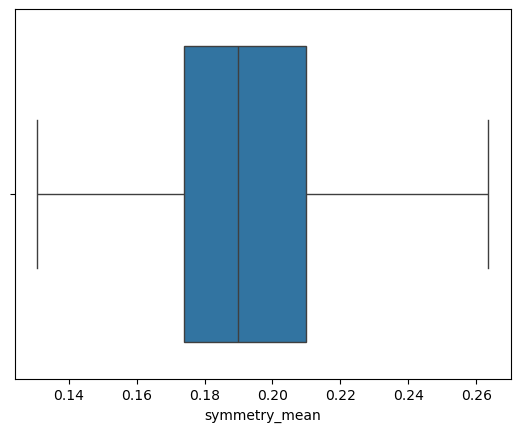

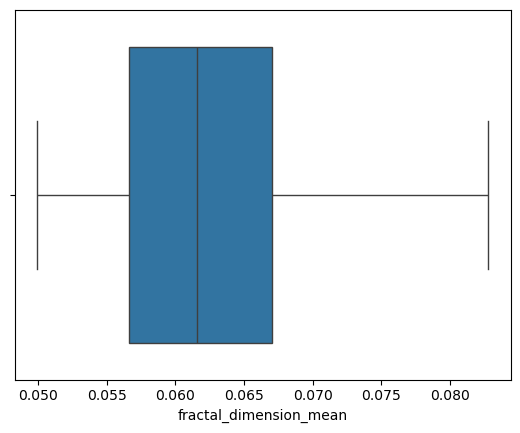

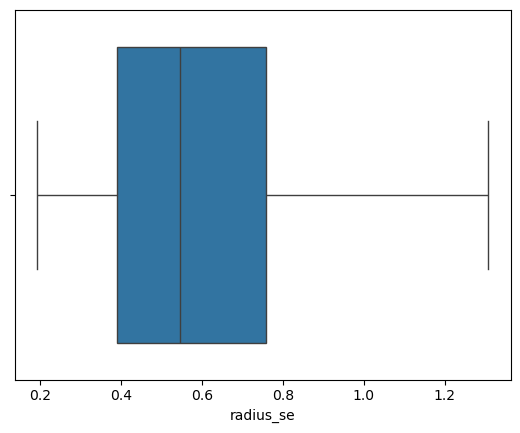

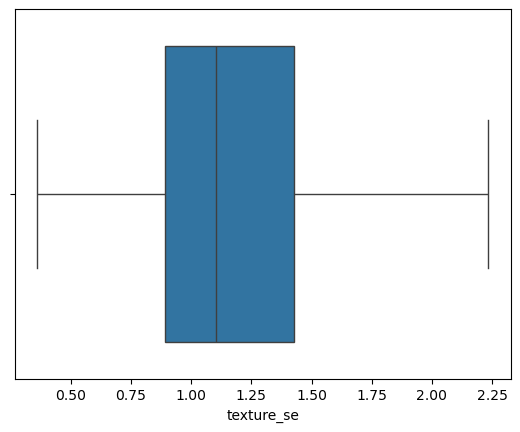

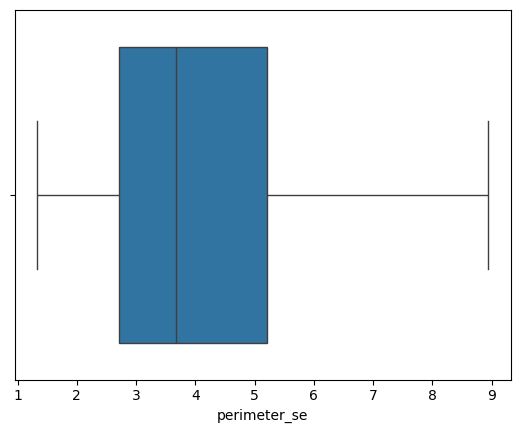

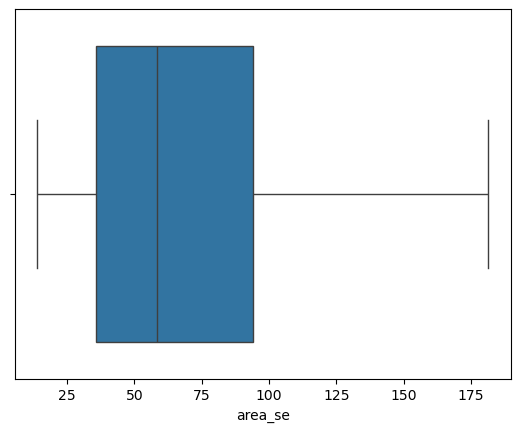

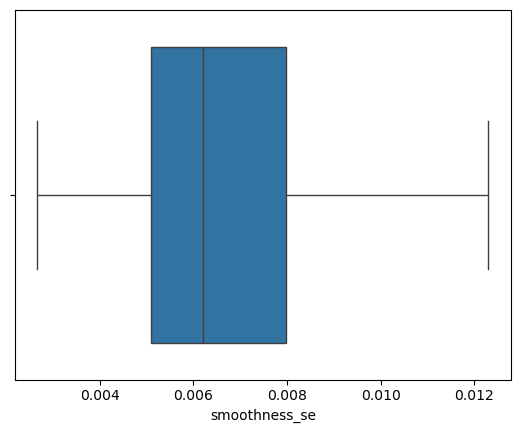

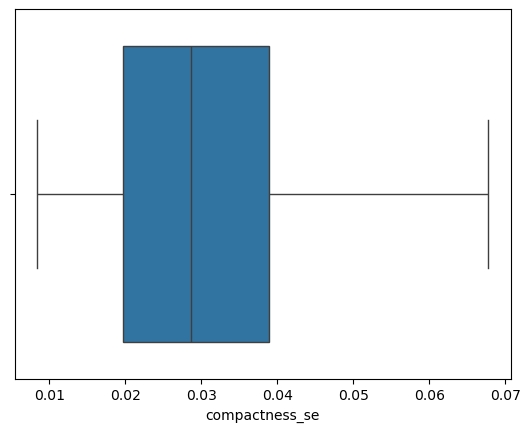

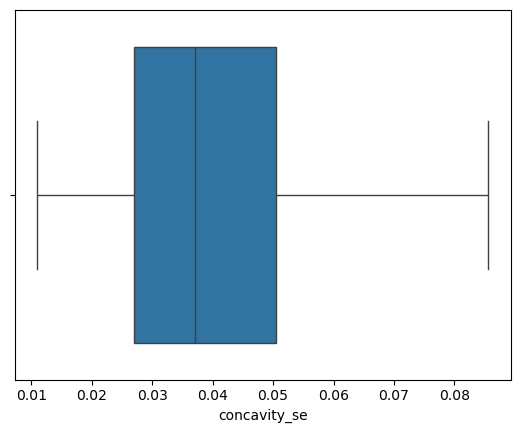

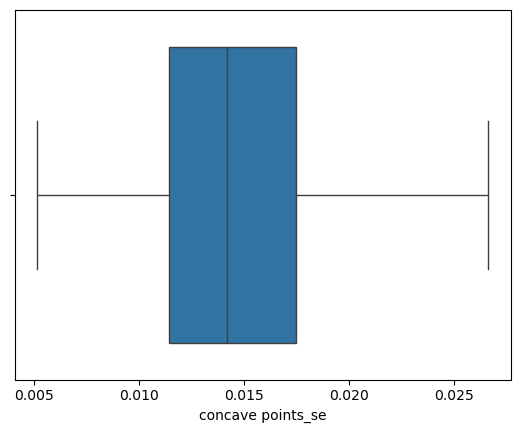

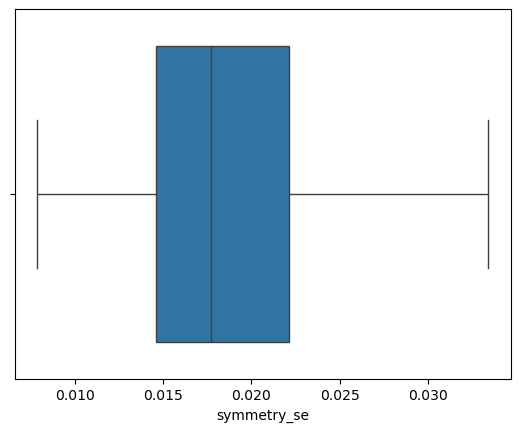

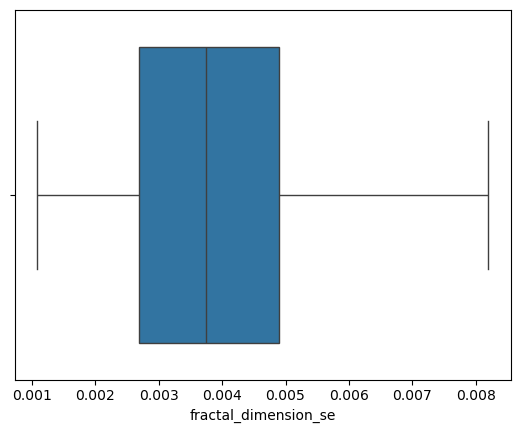

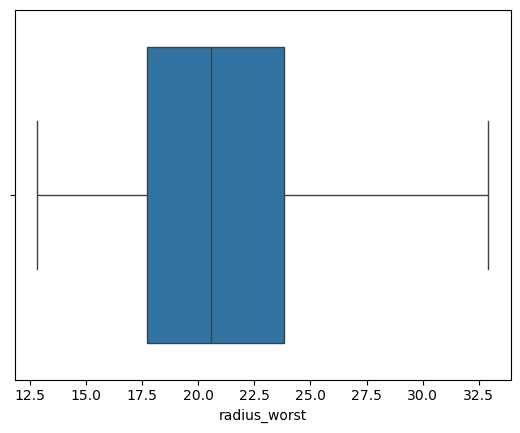

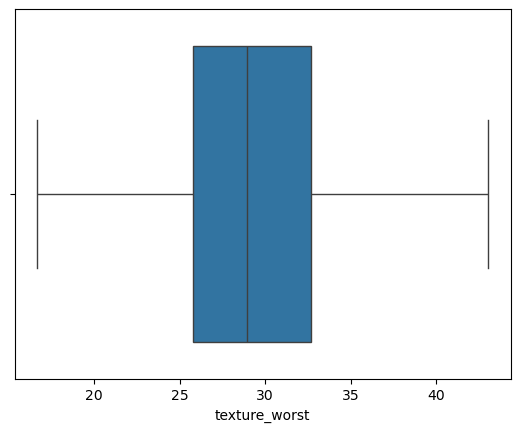

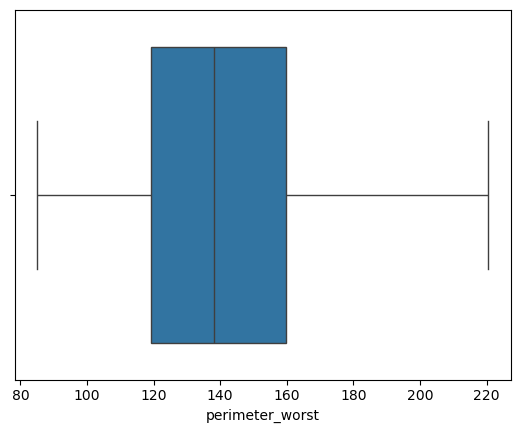

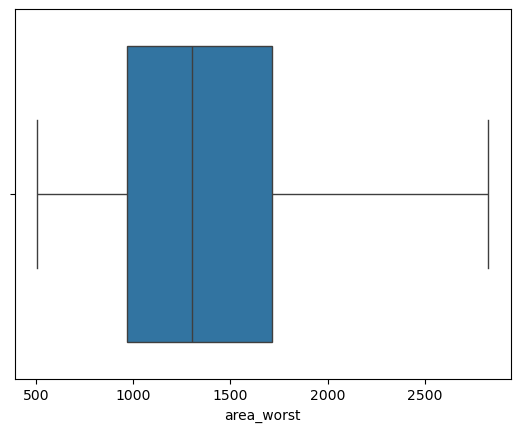

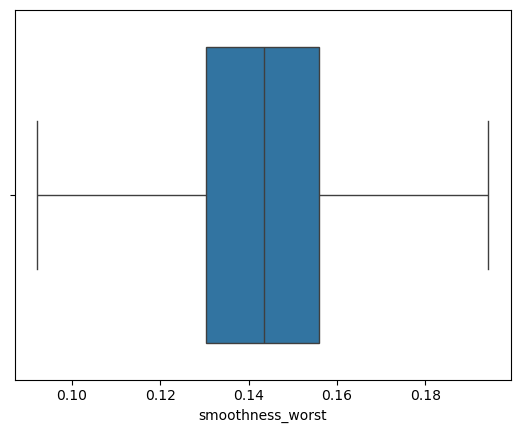

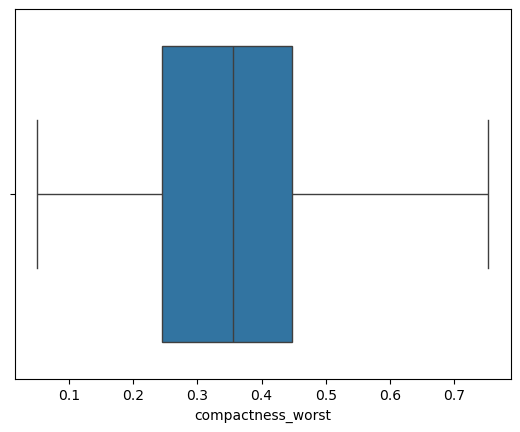

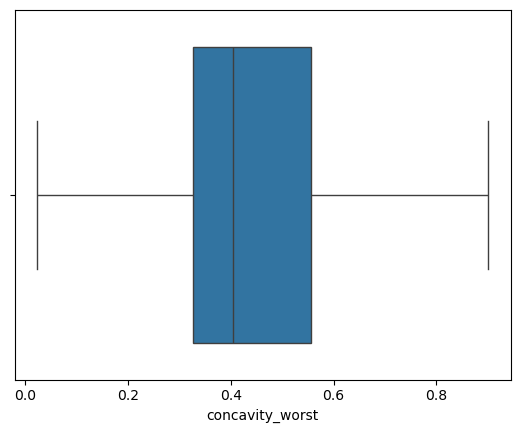

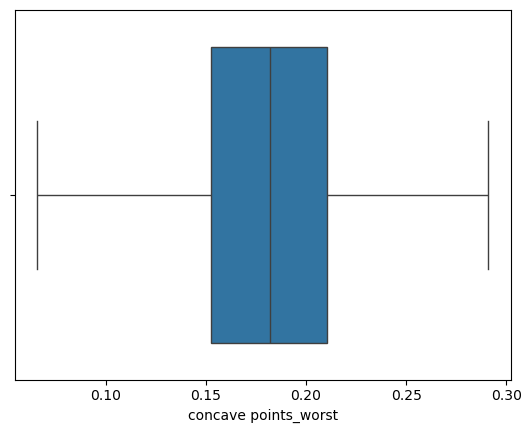

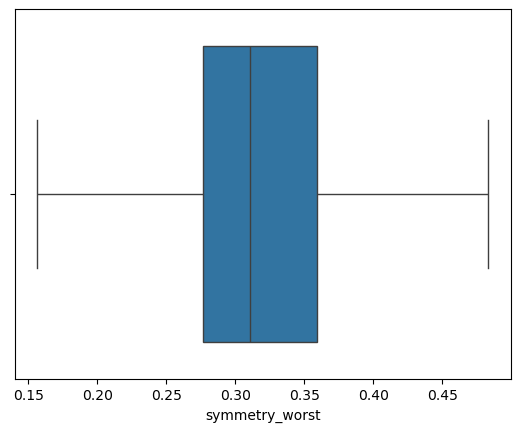

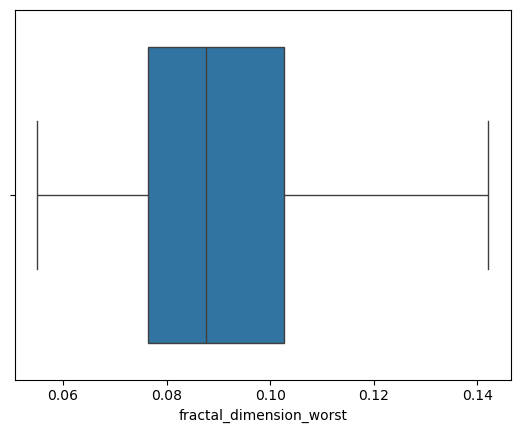

In [77]:
for col in cols:
    sns.boxplot(x = cancer_Mp[col])
    plt.show()

Vamos a aplicar PCA para visualizar nuestros datos. A partir de ahora todo con Pyspark.

In [78]:
# Convertir el DataFrame de pandas a DataFrame de Spark
cancer_Mspark = spark.createDataFrame(cancer_Mp)

# Mostrar el DataFrame de Spark
cancer_Mspark.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+-----------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+-------------------+------------------+---------------+--------------------+------------------+-----------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|     perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|   smoothness_worst| compactness_worst|concavity_worst|concave points_worst|    symmetry_worst|fractal_dimension_worst|
+-----------+------------+--------------+---------+---------

In [80]:
# Para aplicar un modelo de Spark debemos vectorizar nuestros datos para cada punto.

from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cancer_Mspark.columns,outputCol="features")
cancer_Mspark = assembler.transform(cancer_Mspark)
cancer_Mspark.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+-----------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+-------------------+------------------+---------------+--------------------+------------------+-----------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|     perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|   smoothness_worst| compactness_worst|concavity_worst|concave points_worst|    symmetry_worst|fractal_dimension_worst|            features|
+-----------+-----

In [81]:
# Aplicamos el método StandardScaler para escalar nuestros datos y dejarlos con media nula y varianza la unidad.
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=True)  #Marcamos withMean=True para que nos escale los datos con media nula.

scalerModel = scaler.fit(cancer_Mspark)
cancer_Mspark_scaled = scalerModel.transform(cancer_Mspark)
cancer_Mspark_scaled.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+-----------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+-------------------+------------------+---------------+--------------------+------------------+-----------------------+--------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|     perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|   smoothness_worst| compactness_worst|concavity_worst|concave points_worst|    symmetry_worst|fractal_dimension_worst|            feature

Ahora, por fin, sí aplicamos PCA:

In [82]:
from pyspark.ml.feature import PCA

pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")
pcamodel = pca.fit(cancer_Mspark_scaled)
cancer_Mpca_spark = pcamodel.transform(cancer_Mspark_scaled).select('pcaFeatures')

In [84]:
cancer_Mpca_spark.show(truncate=False)

+-----------------------------------------+
|pcaFeatures                              |
+-----------------------------------------+
|[-6.68339298247497,-2.099741930667425]   |
|[1.6056879888083306,3.547859048976796]   |
|[-2.4671194779943275,0.5848236901499747] |
|[-3.164053796853506,-8.91193973705523]   |
|[-1.2045819881654052,2.186948024826938]  |
|[1.1285185273254998,-5.2535604935678055] |
|[1.9922432085286566,1.8455889269387973]  |
|[1.462705249147037,-3.0913375776078063]  |
|[0.574421559177012,-4.988044008769256]   |
|[-1.9007497983183126,-7.958716717347888] |
|[5.443045786595727,1.895333762410097]    |
|[1.2330278484792494,-0.9389001848370432] |
|[-4.930615297974257,-0.846905989677362]  |
|[3.0181809529763624,0.7217646187081802]  |
|[-1.0796307996897514,-6.3670669873542725]|
|[-0.05105475461768988,-4.619070635194973]|
|[4.035189772333885,0.6778439276019458]   |
|[-0.6690047579479312,-2.451136391448517] |
|[-1.0345404287131745,3.6351947273932863] |
|[-1.9864631688806584,-4.0082761

In [85]:
column_names=['Primera_componente','Segunda_Componente']
##ESTO ES PARA CONVERTIR EL VECTOR DENSE (DONDE SE HA ALMACENADO LAS COMPONENTES DE SPARK EN UN DATAFRAME)
cancer_Mpca = cancer_Mpca_spark.rdd.map(lambda x:[float(y) for y in x['pcaFeatures']]).toDF(column_names)

In [88]:
cancer_Mpca.show()

+--------------------+-------------------+
|  Primera_componente| Segunda_Componente|
+--------------------+-------------------+
|   -6.68339298247497| -2.099741930667425|
|  1.6056879888083306|  3.547859048976796|
| -2.4671194779943275| 0.5848236901499747|
|  -3.164053796853506|  -8.91193973705523|
| -1.2045819881654052|  2.186948024826938|
|  1.1285185273254998|-5.2535604935678055|
|  1.9922432085286566| 1.8455889269387973|
|   1.462705249147037|-3.0913375776078063|
|   0.574421559177012| -4.988044008769256|
| -1.9007497983183126| -7.958716717347888|
|   5.443045786595727|  1.895333762410097|
|  1.2330278484792494|-0.9389001848370432|
|  -4.930615297974257| -0.846905989677362|
|  3.0181809529763624| 0.7217646187081802|
| -1.0796307996897514|-6.3670669873542725|
|-0.05105475461768988| -4.619070635194973|
|   4.035189772333885| 0.6778439276019458|
| -0.6690047579479312| -2.451136391448517|
| -1.0345404287131745| 3.6351947273932863|
| -1.9864631688806584| -4.008276179706989|
+----------

In [89]:
cancer_Mpca = cancer_Mpca.toPandas()

In [92]:
cancer_Mpca.head()

,Primera_componente,Segunda_Componente
0,-6.683393,-2.099742
1,1.605688,3.547859
2,-2.467119,0.584824
3,-3.164054,-8.911940
4,-1.204582,2.186948


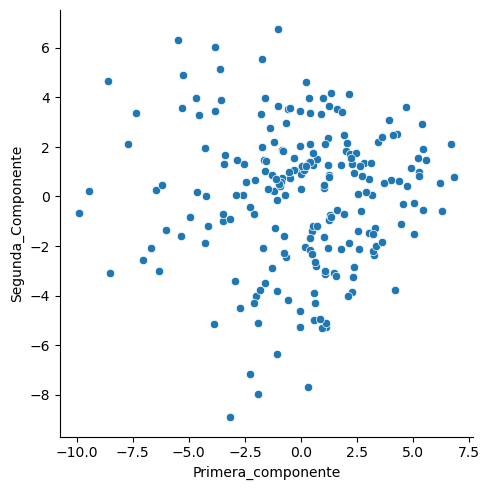

In [93]:
# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mpca, x="Primera_componente", y="Segunda_Componente")

plt.show()

In [94]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# MÉTODO DE ELBOW CON PYSPARK
cost =[]

for i in range(2,15):
    kmeans = KMeans(featuresCol='scaledFeatures',k=i)
    kmeansmodel = kmeans.fit(cancer_Mspark_scaled)
    summary = kmeansmodel.summary
    cost.append(summary.trainingCost)

In [95]:
cost

[4994.557363581445,
 4037.6881958436466,
 3589.5253097501895,
 3360.2683584960846,
 3204.5317424187638,
 3028.765378878681,
 3019.1963478526272,
 2852.1942335869458,
 2726.9521314523868,
 2626.8946235903272,
 2519.577068426173,
 2461.14217466438,
 2493.0258260683486]

In [110]:
num_clusters = list(range(2, 15))
num_clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

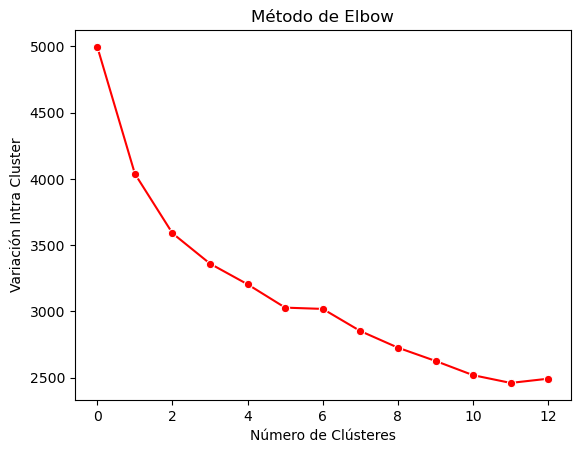

In [115]:
sns.lineplot(cost, marker='o',color='red')
plt.title('Método de Elbow')
plt.xlabel('Número de Clústeres')
plt.ylabel('Variación Intra Cluster')
plt.show()

In [116]:
sil_evaluador=[]
for i in range(2,15):
    kmeans = KMeans(featuresCol='scaledFeatures',k=i)
    kmeansmodel = kmeans.fit(cancer_Mspark_scaled)
    evaluator = ClusteringEvaluator(featuresCol='scaledFeatures', predictionCol='prediction')
    silhouette = evaluator.evaluate(kmeansmodel.transform(cancer_Mspark_scaled))
    sil_evaluador.append(silhouette)

In [118]:
sil_evaluador

[0.3307227567505923,
 0.3199905215089816,
 0.3077968246074192,
 0.26951294734104,
 0.24036890370266065,
 0.2300712653111566,
 0.19818881063326466,
 0.2161186957426581,
 0.2119659330031049,
 0.22290700842173738,
 0.2219569715951405,
 0.21057482188337348,
 0.19368774661931198]

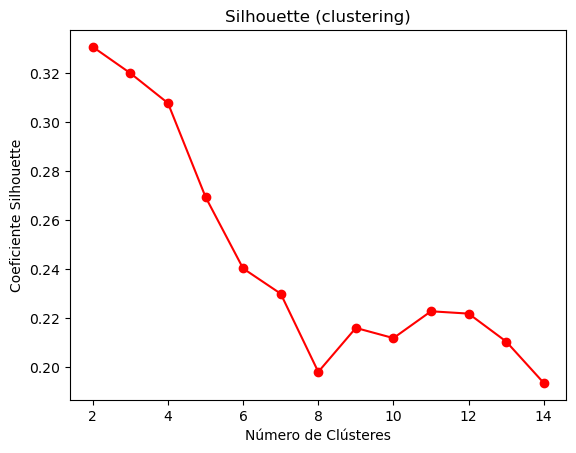

In [117]:
plt.plot(num_clusters, sil_evaluador, marker='o', color='red')

plt.title('Silhouette (clustering)')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente Silhouette')
plt.show()

Habiendo observado el valor de estas dos gráficas, vamos a tomar 4 clústeres.

In [119]:
# Trains a k-means model.
kmeans = KMeans(featuresCol='scaledFeatures',k=4, predictionCol='cluster_km')
kmeansmodel = kmeans.fit(cancer_Mspark_scaled)

# Make predictions
kmeanspredictions = kmeansmodel.transform(cancer_Mspark_scaled)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator(featuresCol='scaledFeatures', predictionCol='cluster_km')

silhouette = evaluator.evaluate(kmeanspredictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.3077968246074192


In [120]:
kmeanspredictions.groupBy('cluster_km').count().show()

+----------+-----+
|cluster_km|count|
+----------+-----+
|         1|   65|
|         3|   52|
|         2|   70|
|         0|   25|
+----------+-----+



In [122]:
#Añadimos nuestras predicciones de kmeans al dataset customer que teníamos antes
cancer_Mkmeanspredictions = kmeanspredictions.toPandas()
cancer_Mkmeans = pd.concat([cancer_Mpca, cancer_Mkmeanspredictions[['cluster_km']]], axis=1)

In [123]:
cancer_Mkmeans

,Primera_componente,Segunda_Componente,cluster_km
0,-6.683393,-2.099742,0
1,1.605688,3.547859,2
2,-2.467119,0.584824,2
3,-3.164054,-8.911940,3
4,-1.204582,2.186948,2
...,...,...,...
207,-6.180424,0.455040,0
208,-3.575932,3.890208,2
209,-0.058426,3.450471,2
210,2.626188,1.210049,1


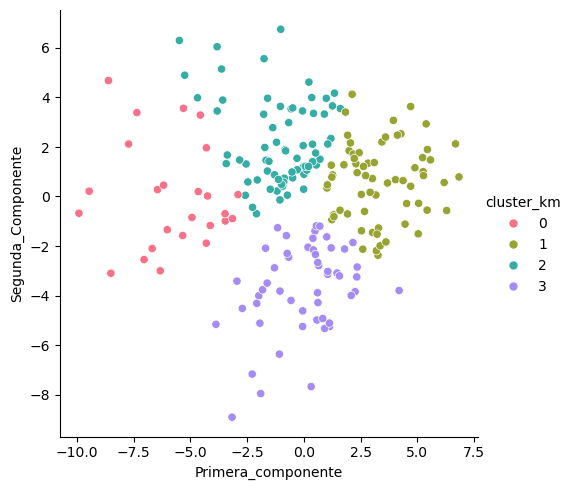

In [127]:
# Definir una paleta de colores para los 3 labels
palette = sns.color_palette("husl", 4)

# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mkmeans, x="Primera_componente", y="Segunda_Componente", hue="cluster_km", palette=palette)

plt.show()

In [128]:
#Este es el Dataframe de Spark con el que estábamos trabajando. Pasemos ahora a trabajar GMM.
cancer_Mspark_scaled.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+-----------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+-------------------+------------------+---------------+--------------------+------------------+-----------------------+--------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|     perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|   smoothness_worst| compactness_worst|concavity_worst|concave points_worst|    symmetry_worst|fractal_dimension_worst|            feature

In [148]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture(k=4,featuresCol='scaledFeatures', predictionCol='cluster_gmm')
gmmmodel = gmm.fit(cancer_Mspark_scaled)

print("Gaussians shown as a DataFrame: ")
gmmmodel.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [149]:
cluster_gmm = gmmmodel.transform(cancer_Mspark_scaled).select("scaledFeatures", "cluster_gmm")
rows = cluster_gmm.collect()

In [150]:
cluster_gmm.show()

+--------------------+-----------+
|      scaledFeatures|cluster_gmm|
+--------------------+-----------+
|[0.17274927940876...|          3|
|[0.99136736397126...|          2|
|[0.71214879249258...|          1|
|[-1.9118711917445...|          0|
|[0.90252509122804...|          3|
|[-1.5850585455820...|          2|
|[0.25524567552746...|          2|
|[-1.1852683182375...|          0|
|[-1.4105469384078...|          2|
|[-1.5818856072697...|          0|
|[-0.4523195681060...|          2|
|[-0.5284700876002...|          1|
|[0.54715600025517...|          3|
|[-0.5062595194143...|          3|
|[-1.1789224416130...|          0|
|[-0.9219144383201...|          1|
|[-0.8774933019485...|          2|
|[-0.4174172466711...|          1|
|[0.75022405223967...|          0|
|[-0.6680793733395...|          0|
+--------------------+-----------+
only showing top 20 rows



In [151]:
# Evaluate clustering by computing Silhouette score
evaluatorgmm = ClusteringEvaluator(featuresCol='scaledFeatures', predictionCol='cluster_gmm')

silhouette = evaluatorgmm.evaluate(cluster_gmm)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.027836909522955186


LA PUNTUACIÓN Silhouette NO ES MUY BUENA EN COMPARACIÓN A LA RENDIDA POR K-MEANS. Puede ser debido a que los datos no proceden de una distribución normal.

In [157]:
cluster_gmm.groupby('cluster_gmm').count().show()

+-----------+-----+
|cluster_gmm|count|
+-----------+-----+
|          1|   62|
|          3|   44|
|          2|   73|
|          0|   33|
+-----------+-----+



In [152]:
#Igual que con el K-means, añadimos nuestras predicciones de kmeans al dataset customer que teníamos antes
cancer_Mgmmpredictions = predictionsgmm.toPandas()
cancer_Mgmm = pd.concat([cancer_Mpca, cancer_Mgmmpredictions[['cluster_gmm']]], axis=1)

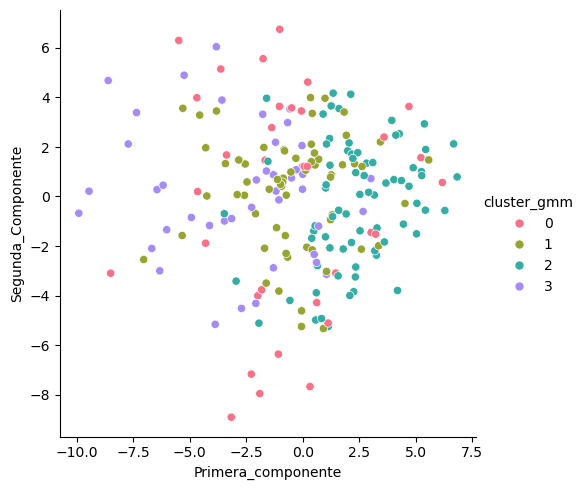

In [158]:
# Definir una paleta de colores para los 3 labels
palette = sns.color_palette("husl", 4)

# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mgmm, x="Primera_componente", y="Segunda_Componente", hue="cluster_gmm", palette=palette)

plt.show()

In [161]:
from pyspark.ml.feature import MinMaxScaler

scalermM = MinMaxScaler(inputCol="features", outputCol="scaledminMaxFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalermMModel = scalermM.fit(cancer_Mspark_scaled)

# rescale each feature to range [min, max].
cancer_Mspark_scaledmM = scalermMModel.transform(cancer_Mspark_scaled)
cancer_Mspark_scaledmM.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+-----------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+-------------------+------------------+---------------+--------------------+------------------+-----------------------+--------------------+--------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|     perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|   smoothness_worst| compactness_worst|concavity_worst|concave points_worst|    symmetry_worst|fractal_dimension_wors

In [175]:
from pyspark.ml.clustering import BisectingKMeans

# Creamos el modelo Bisecting K-means con el número deseado de clústeres (3 en este caso)
bikmeans = BisectingKMeans(k=4, featuresCol="scaledminMaxFeatures", predictionCol="cluster_bikm")

# Ajustamos el modelo a los datos escalados
bikmeansmodel = bikmeans.fit(cancer_Mspark_scaledmM)

# Realizamos la predicción de clústeres en los datos escalados
predictionsbikmeans = bikmeansmodel.transform(cancer_Mspark_scaledmM)

In [163]:
predictionsbikmeans.groupby('cluster_bikm').count().show()

+------------+-----+
|cluster_bikm|count|
+------------+-----+
|           1|   50|
|           3|   39|
|           2|   50|
|           0|   73|
+------------+-----+



In [176]:
# Evaluate clustering by computing Silhouette score
evaluatorbikmeans = ClusteringEvaluator(featuresCol='scaledminMaxFeatures', predictionCol='cluster_bikm')

silhouette = evaluatorbikmeans.evaluate(predictionsbikmeans)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.23210921137138116


In [177]:
#Añadimos nuestras predicciones de kmeans al dataset customer que teníamos antes
cancer_Mbikmeanspredictions = predictionsbikmeans.toPandas()
cancer_Mbikmeans = pd.concat([cancer_Mpca, cancer_Mbikmeanspredictions[['cluster_bikm']]], axis=1)

In [179]:
cancer_Mbikmeans.head()

,Primera_componente,Segunda_Componente,cluster_bikm
0,-6.683393,-2.099742,3
1,1.605688,3.547859,0
2,-2.467119,0.584824,2
3,-3.164054,-8.911940,2
4,-1.204582,2.186948,2


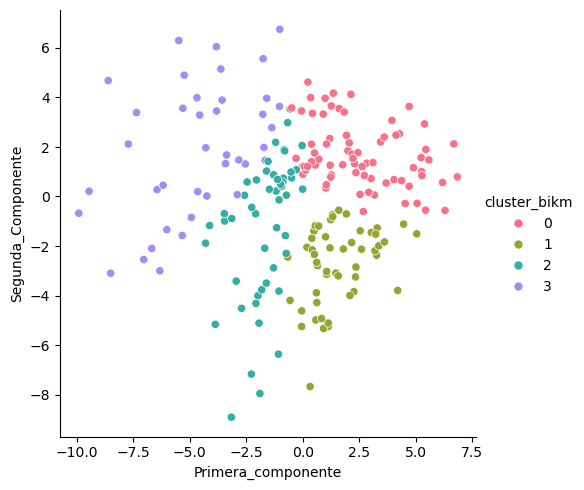

In [180]:
# Definir una paleta de colores para los 3 labels
palette = sns.color_palette("husl", 4)

# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mbikmeans, x="Primera_componente", y="Segunda_Componente", hue="cluster_bikm", palette=palette)

plt.show()